# # Part 1: Check the importance of the features using Random Forest


Import fastai

In [1]:
from fastai.imports import *
np.set_printoptions(linewidth=130)

Create a Dataframe from the csv file 

In [ ]:
import os

#On kaggle
#df = pd.read_csv("/kaggle/input/cancer-competition/train-metadata.csv")

#Or locaaly
df = pd.read_csv("../metadata/train-metadata.csv")

#Or use the aproach you prefer

/var/folders/3_/ffngspn17xb8558j4941dgh40000gn/T/ipykernel_40302/4014989630.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../metadata/train-metadata.csv")


 First look at the data


In [3]:
df.describe()


,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [117]:
df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

Sample of 3 cases

In [118]:
 df.T.sample(n=3, axis=1)

,85180,313829,296929
isic_id,ISIC_2182650,ISIC_7846357,ISIC_7431052
target,0,0,0
patient_id,IP_1474479,IP_4226769,IP_6745108
age_approx,70.0,55.0,55.0
sex,NaN,female,male
anatom_site_general,posterior torso,anterior torso,NaN
clin_size_long_diam_mm,3.0,11.82,2.75
image_type,TBP tile: close-up,TBP tile: close-up,TBP tile: close-up
tbp_tile_type,3D: XP,3D: XP,3D: white
tbp_lv_A,21.013873,20.581282,19.73055


Dropping some unnecessary (at this moment) columns

In [119]:
def drop_columns(df):
    columns = ['copyright_license', 'attribution', 'image_type', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4',
               'iddx_5', 'iddx_full', 'mel_mitotic_index', 'mel_thick_mm', 'tbp_tile_type', 'tbp_lv_dnn_lesion_confidence',
               'lesion_id']
    
    for column in columns:
        try:
            df.drop(column, axis=1, inplace=True)
        except KeyError as e:
            print('No column with name', e)
    
    return df


In [120]:
df_new=drop_columns(df)

Checking NA


In [121]:
df_new.isna().sum()

isic_id                            0
target                             0
patient_id                         0
age_approx                      2798
sex                            11517
anatom_site_general             5756
clin_size_long_diam_mm             0
tbp_lv_A                           0
tbp_lv_Aext                        0
tbp_lv_B                           0
tbp_lv_Bext                        0
tbp_lv_C                           0
tbp_lv_Cext                        0
tbp_lv_H                           0
tbp_lv_Hext                        0
tbp_lv_L                           0
tbp_lv_Lext                        0
tbp_lv_areaMM2                     0
tbp_lv_area_perim_ratio            0
tbp_lv_color_std_mean              0
tbp_lv_deltaA                      0
tbp_lv_deltaB                      0
tbp_lv_deltaL                      0
tbp_lv_deltaLB                     0
tbp_lv_deltaLBnorm                 0
tbp_lv_eccentricity                0
tbp_lv_location                    0
t

Replacing NA with the modes

In [122]:
modes=df.mode().iloc[0]
df_new.fillna(modes, inplace=True)
   
    

Adding the weight associated with a number of pictures of each patient (this takes awhile).

In [124]:
df_new['numb_pic'] = np.nan 

for patient in df_new['patient_id'].unique():
    n = (df_new['patient_id'] == patient).sum()
    df_new.loc[df_new['patient_id'] == patient, 'numb_pic'] = n

 

Just answering the questions about the number of images for each patient: from 1 to 9184, with mean of 1142


In [125]:
df_new['numb_pic'].describe()

count    401059.000000
mean       1142.532647
std        1666.379678
min           1.000000
25%         352.000000
50%         630.000000
75%        1132.000000
max        9184.000000
Name: numb_pic, dtype: float64

Separate categorical varibale and continous ones

In [126]:
cats=['isic_id','patient_id','sex','anatom_site_general','tbp_lv_location','tbp_lv_location_simple']
all_cats=cats+['target']
conts=[x for x in list(df_new.columns) if x not in all_cats]
dep= 'target'

for col in cats:
    df_new[col] = pd.Categorical(df_new[col])

Split the data

In [127]:
from numpy import random
from sklearn.model_selection import train_test_split

# random.seed(42)

trn_df,val_df = train_test_split (df_new, test_size=0.25,shuffle=True, stratify=df_new['target'])
for col in cats:
    trn_df[col] = trn_df[col].astype('category')
    val_df[col] = val_df[col].astype('category')

# Apply categorical encoding
for col in cats:
    trn_df[col] = trn_df[col].cat.codes
    val_df[col] = val_df[col].cat.codes

# Check the data types of the training DataFrame to confirm the conversion
print(trn_df.dtypes)

isic_id                          int32
target                           int64
patient_id                       int16
age_approx                     float64
sex                               int8
anatom_site_general               int8
clin_size_long_diam_mm         float64
tbp_lv_A                       float64
tbp_lv_Aext                    float64
tbp_lv_B                       float64
tbp_lv_Bext                    float64
tbp_lv_C                       float64
tbp_lv_Cext                    float64
tbp_lv_H                       float64
tbp_lv_Hext                    float64
tbp_lv_L                       float64
tbp_lv_Lext                    float64
tbp_lv_areaMM2                 float64
tbp_lv_area_perim_ratio        float64
tbp_lv_color_std_mean          float64
tbp_lv_deltaA                  float64
tbp_lv_deltaB                  float64
tbp_lv_deltaL                  float64
tbp_lv_deltaLB                 float64
tbp_lv_deltaLBnorm             float64
tbp_lv_eccentricity      

Separate independent varioables (x) and dependent (y)

In [128]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);


Just show one tree to see how it works


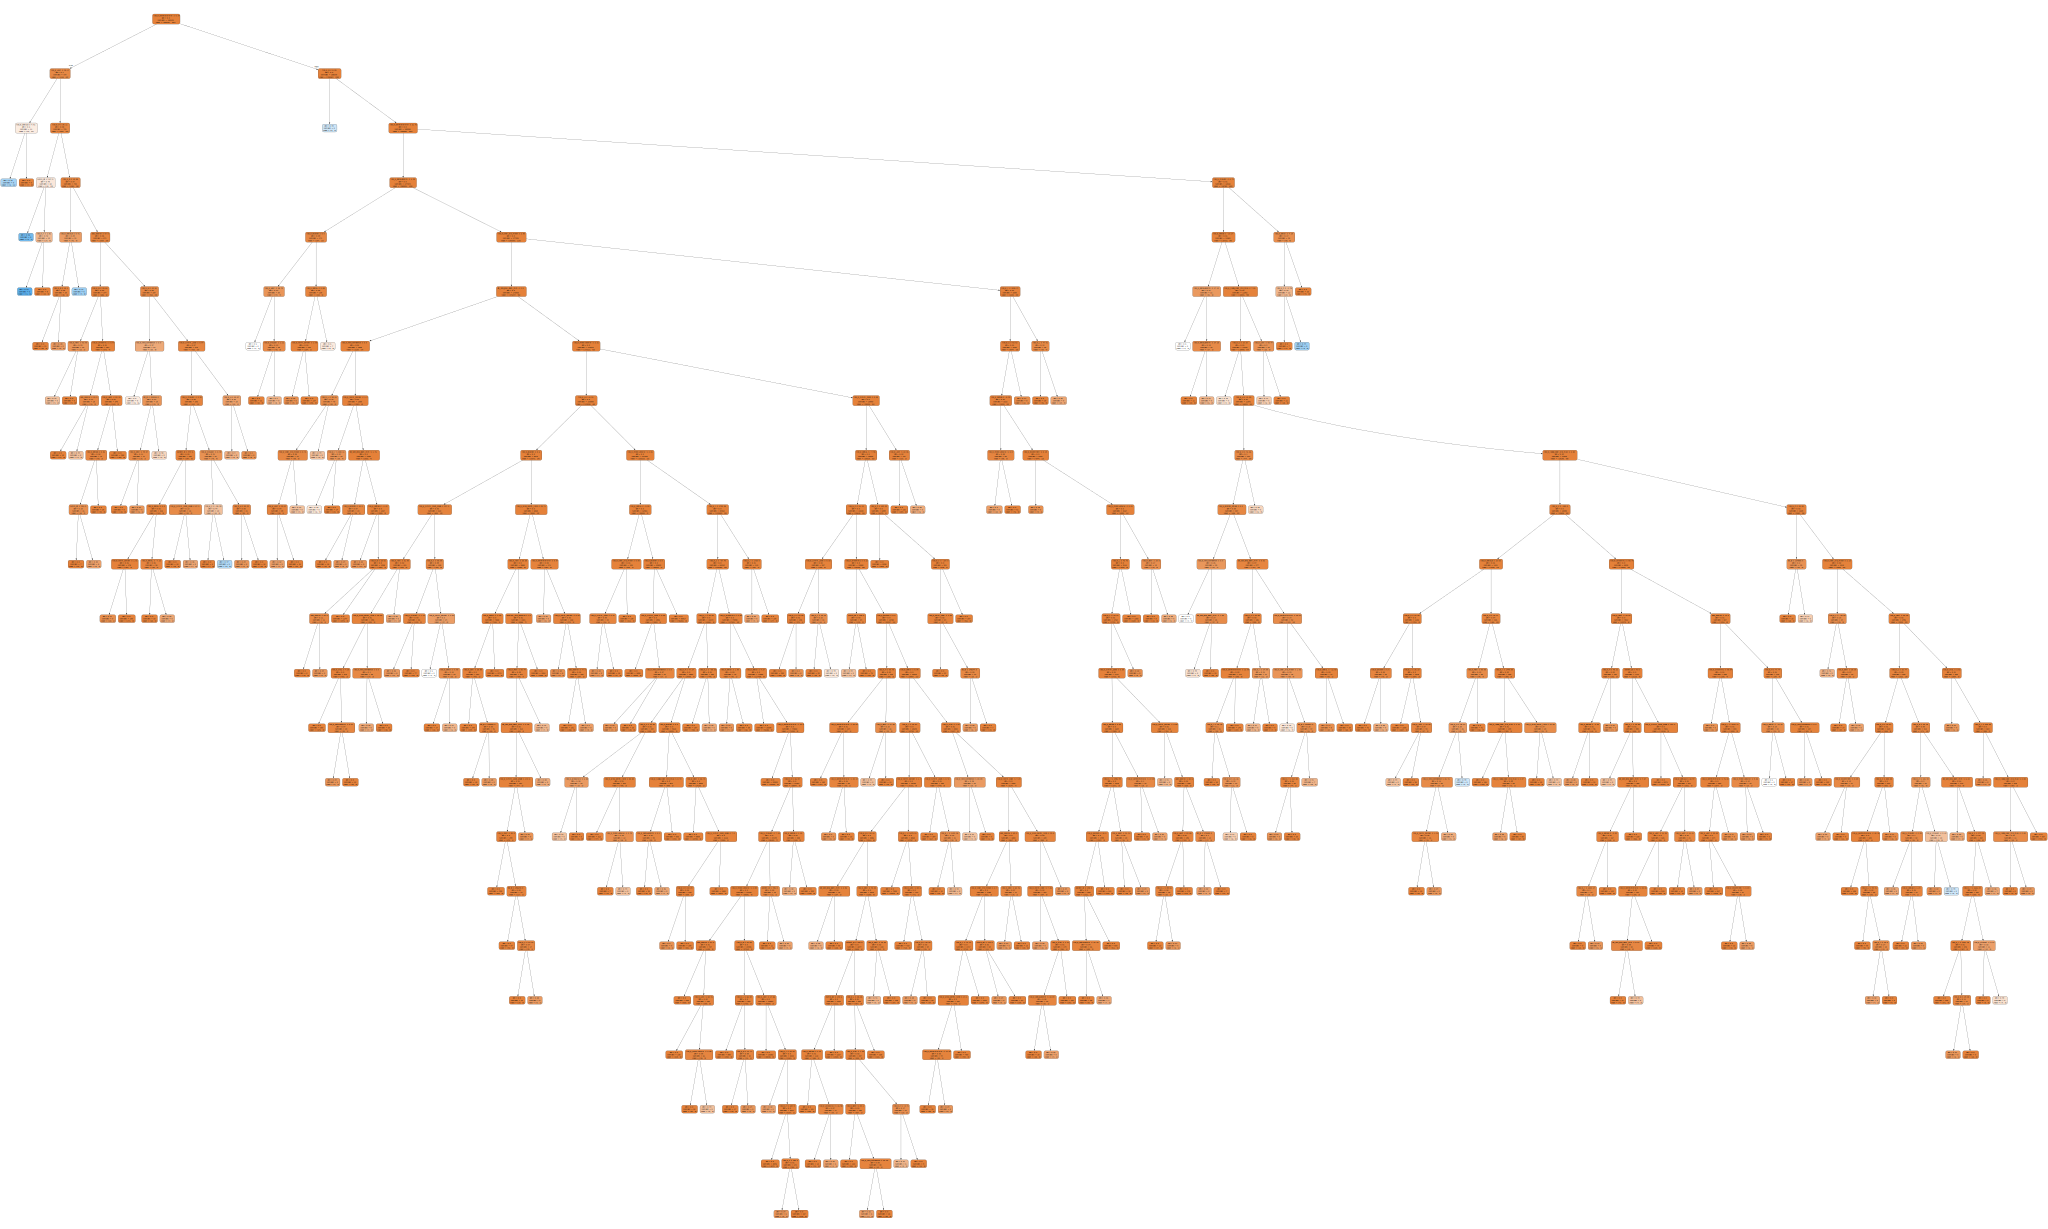

In [130]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

tree = rf.estimators_[0]


# Draw the tree
draw_tree(tree, trn_xs, size=100)

Looking at the importance of each feature

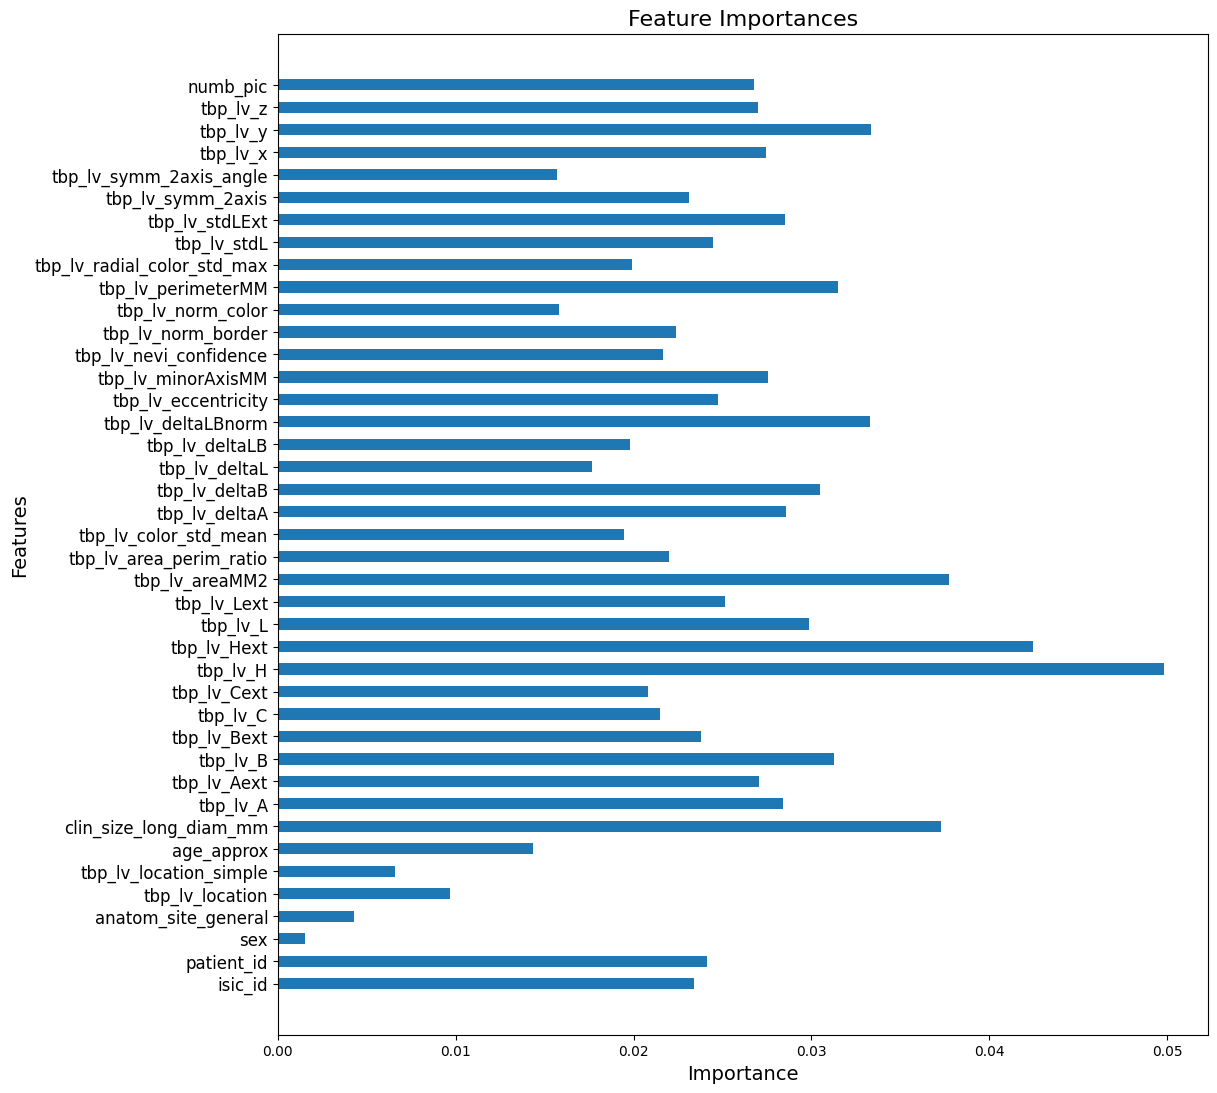

In [131]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Create the DataFrame
df = pd.DataFrame(dict(cols=trn_xs.columns, imp=rf.feature_importances_))

# Increase the figure size (height)
fig, ax = plt.subplots(figsize=(12, 13))  # Adjust height as needed

# Plot using matplotlib's barh
ax.barh(df['cols'], df['imp'], height=0.5)  # Adjust height for bar width

# Add labels and title
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances', fontsize=16)

# Optional: Customize tick labels if needed
ax.tick_params(axis='y', labelsize=12)

# Display the plot
plt.show()

Importing the metric 

In [132]:
"""
2024 ISIC Challenge primary prize scoring metric

Given a list of binary labels, an associated list of prediction 
scores ranging from [0,1], this function produces, as a single value, 
the partial area under the receiver operating characteristic (pAUC) 
above a given true positive rate (TPR).
https://en.wikipedia.org/wiki/Partial_Area_Under_the_ROC_Curve.

(c) 2024 Nicholas R Kurtansky, MSKCC
"""

import numpy as np
import pandas as pd
import pandas.api.types
from sklearn.metrics import roc_curve, auc, roc_auc_score

class ParticipantVisibleError(Exception):
    pass


def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str, min_tpr: float=0.80) -> float:
    '''
    2024 ISIC Challenge metric: pAUC
    
    Given a solution file and submission file, this function returns the
    the partial area under the receiver operating characteristic (pAUC) 
    above a given true positive rate (TPR) = 0.80.
    https://en.wikipedia.org/wiki/Partial_Area_Under_the_ROC_Curve.
    
    (c) 2024 Nicholas R Kurtansky, MSKCC

    Args:
        solution: ground truth pd.DataFrame of 1s and 0s
        submission: solution dataframe of predictions of scores ranging [0, 1]

    Returns:
        Float value range [0, max_fpr]
    '''

    del solution[row_id_column_name]
    del submission[row_id_column_name]

    # check submission is numeric
    if not pandas.api.types.is_numeric_dtype(submission.values):
        raise ParticipantVisibleError('Submission target column must be numeric')

    # rescale the target. set 0s to 1s and 1s to 0s (since sklearn only has max_fpr)
    v_gt = abs(np.asarray(solution.values)-1)
    
    # flip the submissions to their compliments
    v_pred = -1.0*np.asarray(submission.values)

    max_fpr = abs(1-min_tpr)

    # using sklearn.metric functions: (1) roc_curve and (2) auc
    fpr, tpr, _ = roc_curve(v_gt, v_pred, sample_weight=None)
    if max_fpr is None or max_fpr == 1:
        return auc(fpr, tpr)
    if max_fpr <= 0 or max_fpr > 1:
        raise ValueError("Expected min_tpr in range [0, 1), got: %r" % min_tpr)
        
    # Add a single point at max_fpr by linear interpolation
    stop = np.searchsorted(fpr, max_fpr, "right")
    x_interp = [fpr[stop - 1], fpr[stop]]
    y_interp = [tpr[stop - 1], tpr[stop]]
    tpr = np.append(tpr[:stop], np.interp(max_fpr, x_interp, y_interp))
    fpr = np.append(fpr[:stop], max_fpr)
    partial_auc = auc(fpr, tpr)

#     # Equivalent code that uses sklearn's roc_auc_score
#     v_gt = abs(np.asarray(solution.values)-1)
#     v_pred = np.array([1.0 - x for x in submission.values])
#     max_fpr = abs(1-min_tpr)
#     partial_auc_scaled = roc_auc_score(v_gt, v_pred, max_fpr=max_fpr)
#     # change scale from [0.5, 1.0] to [0.5 * max_fpr**2, max_fpr]
#     # https://math.stackexchange.com/questions/914823/shift-numbers-into-a-different-range
#     partial_auc = 0.5 * max_fpr**2 + (max_fpr - 0.5 * max_fpr**2) / (1.0 - 0.5) * (partial_auc_scaled - 0.5)
    
    return(partial_auc)

Making a DataFrame from the prediction series + making index as a row_id_column_name to fit the score()


In [133]:
val_yDf=pd.DataFrame(val_y)
predDf=pd.DataFrame(rf.predict(val_xs))

In [134]:
val_reset = val_yDf.reset_index()
pred_reset=predDf.reset_index()

In [135]:
val_reset.describe()

,index,target
count,100265.000000,100265.000000
mean,200549.750202,0.000977
std,115623.227369,0.031248
min,6.000000,0.000000
25%,99964.000000,0.000000
50%,200678.000000,0.000000
75%,300593.000000,0.000000
max,401053.000000,1.000000


Calculating the score


In [136]:
score(val_reset, pred_reset,'index')

0.01999999999999999